In [1]:
import sys
import os
import importlib
from pathlib import Path

In [89]:
# Add the parent directory of the current script to the Python path
current_dir = current_dir = os.getcwd()
ml4qs_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
filedir = os.path.abspath(os.path.join(ml4qs_dir, 'measurement-data'))
PythonPath= os.path.abspath(os.path.join(ml4qs_dir, 'Python3Code'))
sys.path.append(filedir)
sys.path.append(PythonPath)

#make sure directories are set properly such that you can import CreateDataset as a package
print(f"Current directory: {filedir}")
print(f"ML4QS directory: {PythonPath}")
print(f"sys.path: {sys.path}")


Current directory: c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60\measurement-data
ML4QS directory: c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60\Python3Code
sys.path: ['c:\\Users\\chris\\miniconda3\\envs\\myenv\\python38.zip', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\DLLs', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib', 'c:\\Users\\chris\\miniconda3\\envs\\myenv', '', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib\\site-packages', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib\\site-packages\\win32', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib\\site-packages\\Pythonwin', 'c:\\Users\\chris\\OneDrive\\Documenten\\GitHub\\ML4QS-group60', 'c:\\Users\\chris\\OneDrive\\Documenten\\GitHub\\ML4QS-group60', 'c:\\Users\\chris\\OneDrive\\Documenten\\GitHub\\ML4QS-group60', 'c:\\Users\\chris\\OneDrive\\Documenten\\GitHub\\ML4QS-group60\\Python3Code', 'c:\\Users\\chris\\OneDrive\\Documenten\

In [90]:
import sys
import os

#clean paths in directory 
def clean_sys_path():
    # Create a set to track seen directories
    seen = set()
    cleaned_path = []

    for path in sys.path:
        # Check if the path is a valid directory
        if os.path.isdir(path):
            # Only add the path if it hasn't been seen before
            if path not in seen:
                seen.add(path)
                cleaned_path.append(path)
        else:
            print(f"Removing faulty path: {path}")

    # Update sys.path with the cleaned list
    sys.path = cleaned_path

    # Print the cleaned sys.path
    print("Cleaned sys.path:")
    for path in sys.path:
        print(path)

# Clean sys.path
clean_sys_path()


Removing faulty path: c:\Users\chris\miniconda3\envs\myenv\python38.zip
Removing faulty path: 
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\measurement data
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\measurement data\Python3Code
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\Python3Code
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\Python3Code
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60\measurement data
Cleaned sys.path:
c:\Users\chris\miniconda3\envs\myenv\DLLs
c:\Users\chris\miniconda3\envs\myenv\lib
c:\Users\chris\miniconda3\envs\myenv
c:\Users\chris\miniconda3\envs\myenv\lib\site-packages
c:\Users\chris\miniconda3\envs\myenv\lib\site-packages\win32
c:\Users\chris\miniconda3\envs\myenv\lib\site-packages\win32\lib
c:\Users\chris\miniconda3\envs\myenv\lib\site-packages\Pythonwin
c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60
c:\Users\chris\OneDrive\Documenten\GitHub\ML

In [82]:
from Python3Code.Chapter2 import CreateDataset
importlib.reload(CreateDataset)
# Otherwise changes in CreateDatasetClass are not automatically reloaded. 
from Python3Code.Chapter2.CreateDataset import CreateDatasetClass 

date = '2024-01-01'
granularity = 100  # in milliseconds (0.1 second)
start_time = date + ' 00:00:00'
end_time = date + ' 00:00:20'
form = True
cols = ['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)', 'Absolute (rad/s)', 'HR (bpm)']
prefix = 'rotation_'

dataset_creator = CreateDatasetClass(Path(current_dir), granularity)
dataset_creator.create_dataset(start_time, end_time, cols, prefix)

relevcols = ['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)', 'Absolute (rad/s)']
file = 'Arm_aron_1/Gyroscope.csv'
timestamp_col = 'Time (s)'
aggregation='avg'
dataset_creator.add_numerical_dataset(file, timestamp_col, relevcols, date, aggregation, prefix)

relevcols2 = ['HR (bpm)']
file2 = 'Chris_Hoynck+_2024-06-05_21-48-34.CSV'
timestamp_col = 'Time'
form = False
dataset_creator.add_numerical_dataset(file2, timestamp_col, relevcols2, date, aggregation, prefix)
#print(min(dataset_creator.data_table[timestamp_col]))



Reading data from Arm_aron_1/Gyroscope.csv


FileNotFoundError: [Errno 2] File c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60\assign1\Arm_aron_1\Gyroscope.csv does not exist: 'c:\\Users\\chris\\OneDrive\\Documenten\\GitHub\\ML4QS-group60\\assign1\\Arm_aron_1\\Gyroscope.csv'

In [79]:
dataset_creator.data_table

,rotation_Gyroscope x (rad/s),rotation_Gyroscope y (rad/s),rotation_Gyroscope z (rad/s),rotation_Absolute (rad/s),rotation_HR (bpm)
2024-01-01 00:00:00.000,-0.382634,-0.220018,-0.088523,0.458767,93.0
2024-01-01 00:00:00.100,-0.049343,-0.107484,0.040924,0.139714,93.0
2024-01-01 00:00:00.200,-0.130287,-0.129311,0.042581,0.192252,93.0
2024-01-01 00:00:00.300,-0.343626,-0.453959,0.269167,0.632008,93.0
2024-01-01 00:00:00.400,-1.368840,-0.875676,0.785530,1.814966,93.0
...,...,...,...,...,...
2024-01-01 00:00:19.600,0.573505,-0.055194,-0.408032,1.069749,88.0
2024-01-01 00:00:19.700,1.960806,-0.573886,-1.428800,2.516569,88.0
2024-01-01 00:00:19.800,3.125104,-1.797955,-1.508759,4.002028,88.0
2024-01-01 00:00:19.900,2.218089,-3.837375,-2.422379,5.109913,88.0


Index(['rotation_Gyroscope x (rad/s)', 'rotation_Gyroscope y (rad/s)',
       'rotation_Gyroscope z (rad/s)', 'rotation_Absolute (rad/s)',
       'rotation_HR (bpm)'],
      dtype='object')


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 640x480 with 0 Axes>

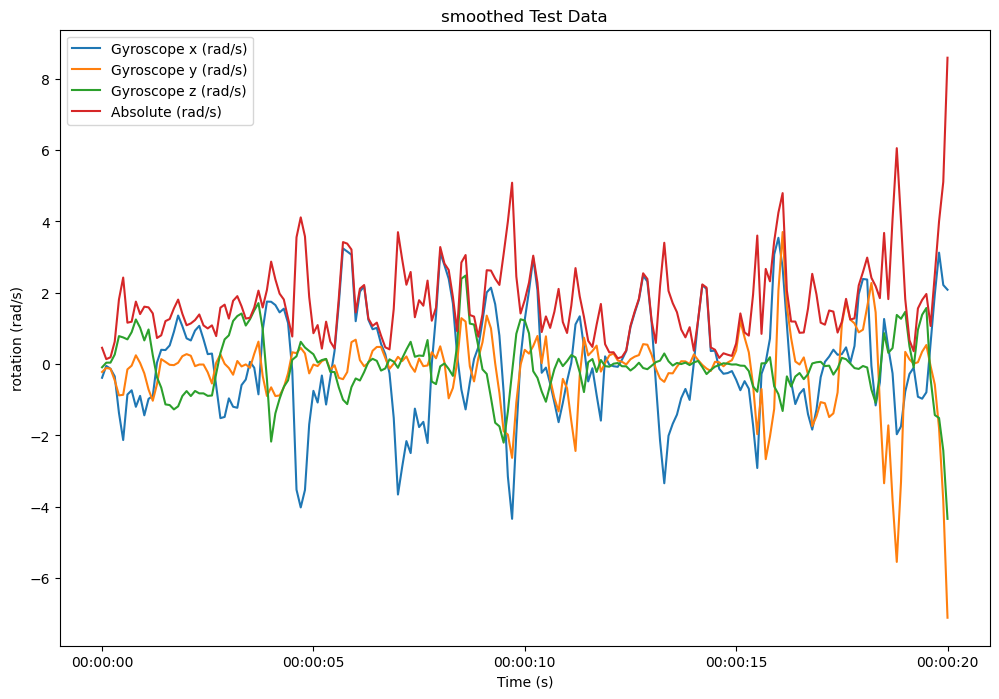

In [71]:
import matplotlib.pyplot as plt

plt.figure()
size = 10
mark = "+"
aggregated_data = dataset_creator.data_table
plt.figure(figsize=(12,8))
plt.title("smoothed Test Data")
print(aggregated_data.columns)
plt.plot(aggregated_data.index, aggregated_data['rotation_Gyroscope x (rad/s)'], label = 'Gyroscope x (rad/s)')
plt.plot(aggregated_data.index, aggregated_data['rotation_Gyroscope y (rad/s)'], label = 'Gyroscope y (rad/s)')
plt.plot(aggregated_data.index, aggregated_data['rotation_Gyroscope z (rad/s)'], label = 'Gyroscope z (rad/s)')
plt.plot(aggregated_data.index, aggregated_data['rotation_Absolute (rad/s)'], label = 'Absolute (rad/s)')
plt.xlabel("Time (s)")
plt.ylabel("rotation (rad/s)")
plt.legend()
plt.show

In [15]:
from Python3Code.Chapter3 import OutlierDetection
importlib.reload(OutlierDetection)
# Otherwise changes in CreateDatasetClass are not automatically reloaded. 
from Python3Code.Chapter3.OutlierDetection import DistanceBasedOutlierDetection